In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import plotly.express as px
import seaborn as sns
import plotly.subplots
#from sklearn.preprocessing import LabelEncoder
from scipy.stats import pearsonr

In [ ]:
# This file creates the graphs that are used for the Moriro presentation at the NSDS booth at the November 2024 Statutory meetings
# and the Video posted in the Community of Practice
# The data is from the Individual.csv file
# that is in the same directory as this file

# Load the dataframe
file_path = "Individual.csv"
df = pd.read_csv(file_path, sep=",", encoding='utf-8')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9980 entries, 0 to 9979
Data columns (total 44 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Team Name         9980 non-null   object 
 1   Well-being        9980 non-null   float64
 2   Needs             9980 non-null   float64
 3   Engagement        9980 non-null   float64
 4   Autonomy          9980 non-null   float64
 5   Belonging         9980 non-null   float64
 6   Competence        9980 non-null   float64
 7   Leadership        9980 non-null   float64
 8   Management        9980 non-null   float64
 9   Returns           9980 non-null   float64
 10  Rewards           9980 non-null   float64
 11  Status            9980 non-null   float64
 12  Myself            9980 non-null   int64  
 13  Tasks             9980 non-null   int64  
 14  Free              9980 non-null   int64  
 15  Mastery           9980 non-null   int64  
 16  Competent         9980 non-null   int64  


In [ ]:
## Number and proportion of volunteers likely to leave the NS

# Load the dataframe from current directory as defined in cell 2 [12]
df = pd.read_csv(file_path, sep=",", encoding='utf-8')

# Count the total number of respondents (n)
n_vol = df['Volunteer'].sum()
n_staff = df['Staff'].sum()

# Create a new column 'Quit' and set it to 0
df['Quit']=0
n_quit = df['Quit'].sum()

print(n_vol, n_staff, n_quit)

# Set Quit to 1 when variable stay is less than 4.
df.loc[df['Stay'] < 4, 'Quit'] = 1

n_quit = df['Quit'].sum()
n_notquit = n_vol - n_quit
print(n_quit, n_vol, n_quit/n_vol, n_notquit, n_notquit/n_vol)

# Drop staff from the dataset
df = df.drop(df[df.Position == 'Staff'].index)
print(n_quit, n_vol, n_quit/n_vol)

8677 1303 0
1755 8677 0.20225884522300333 6922 0.7977411547769967
1755 8677 0.20225884522300333


In [ ]:
## Number and proportion of volunteers who are not "well"

# Load the dataframe from current directory as defined in cell 2 [12]
df = pd.read_csv(file_path, sep=",", encoding='utf-8')

# Count the total number of respondents (n)
n_vol = df['Volunteer'].sum()
n_staff = df['Staff'].sum()

# Create a new column 'Unwell' and set it to 0
df['Unwell']=0
n_unwell = df['Unwell'].sum()

print(n_vol, n_staff, n_unwell)

# Set Quit to 1 when variable stay is less than 4.
df.loc[df['Well-being'] < 3.5, 'Unwell'] = 1

n_unwell = df['Unwell'].sum()
n_well = n_vol - n_unwell
print(n_unwell, n_vol, n_unwell/n_vol, n_well, n_well/n_vol)

# Drop staff from the dataset
df = df.drop(df[df.Position == 'Staff'].index)
print(n_unwell, n_vol, n_unwell/n_vol, n_well, n_well/n_vol)

8677 1303 0
2707 8677 0.31197418462602283 5970 0.6880258153739772
2707 8677 0.31197418462602283 5970 0.6880258153739772


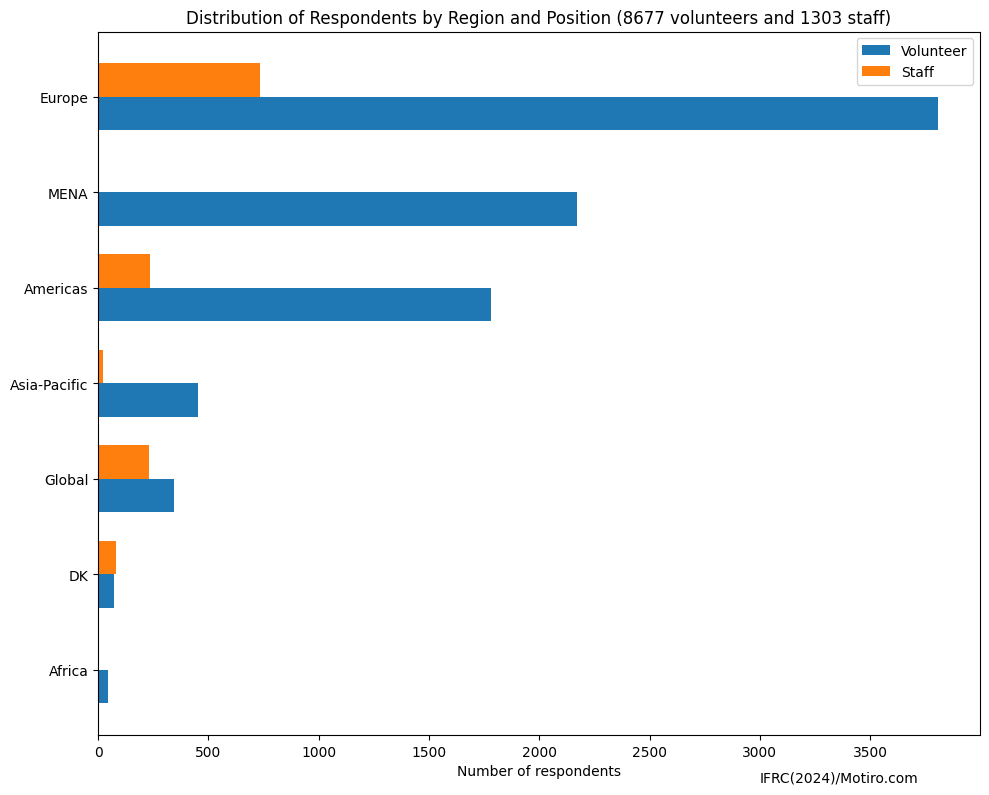

In [ ]:
## Distribution of Respondents by Region and Position

# Load the dataframe from current directory as defined in cell 2 [12]
df = pd.read_csv(file_path, sep=",", encoding='utf-8')

# Count the total number of respondents (n)
n_vol = df['Volunteer'].sum()
n_staff = df['Staff'].sum()

# Group the dataframe by 'Region' and calculate the sum of 'Volunteer' and 'Staff'
grouped_df = df.groupby('Region').agg({'Volunteer': 'sum', 'Staff': 'sum'}).sort_values('Volunteer', ascending=True)


# Get the list of countries
countries = grouped_df.index

# Set the height of each bar
bar_height = 0.35

# Create the figure and axes
fig, ax = plt.subplots(figsize=(10, 8))

# Create an array of indices for the y-axis positions
y = np.arange(len(countries))

# Plot the bars for volunteers
ax.barh(y, grouped_df['Volunteer'], height=bar_height, label='Volunteer')

# Plot the bars for staff
ax.barh(y + bar_height, grouped_df['Staff'], height=bar_height, label='Staff')

# Set the y-axis ticks and labels
ax.set_yticks(y + bar_height / 2)
ax.set_yticklabels(countries)

# Set the x-axis label
ax.set_xlabel('Number of respondents')

# Set the title
ax.set_title(f'Distribution of Respondents by Region and Position ({n_vol} volunteers and {n_staff} staff)')
plt.text(3000, -1, "IFRC(2024)/Motiro.com", fontdict={'size': 10})

# Add a legend
ax.legend()

# Adjust the layout to accommodate the y-axis labels
plt.tight_layout()

plt.savefig('RespondentsByRegionSorted.png')
# Show the plot
plt.show()


8677 0 8677


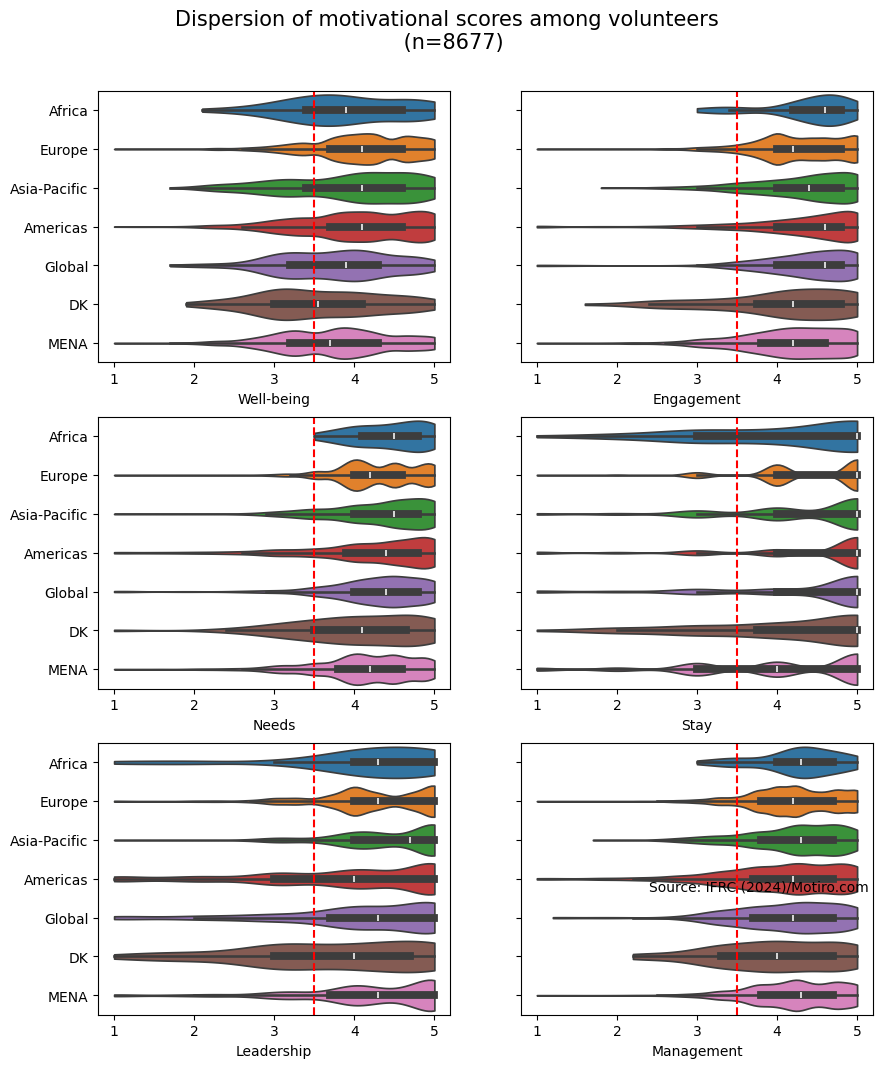

In [16]:
# Box plots to see dispersion in key dimensions, by region (everyone)

# Load the dataframe from current directory as defined in cell 2 [12]
df = pd.read_csv(file_path, sep=",", encoding='utf-8')

# We keep only volunteers
df = df.drop(df[df.Position == 'Staff'].index)

## if you want to select specific regions:
# # Filter the DataFrame for regions to keep 'Europe', 'Americas', 'MENA'
#df = df[df['Region'].isin(['Europe', 'Americas', 'MENA'])].copy()

# Count the total number of respondents (n)
n_vol = df['Volunteer'].sum()
n_staff = df['Staff'].sum()
n = df['Volunteer'].sum() + df['Staff'].sum()
print (n_vol, n_staff, n)

# Specify the x-axis variables for each plot
variables = [
    ('Well-being'),
    ('Engagement'),
    ('Needs'),
    ('Stay'),
    ('Leadership'),
    ('Management')
    ]

# Create a 3x3 grid of subplots sharing the same x-axis and y-axis
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10, 12), sharex=False, sharey=True)

# Flatten the axes array for easier iteration
axes = axes.flatten()

for i, (x_var) in enumerate(variables):
    ax = axes[i]  # Get the current subplot
    sns.violinplot(
    data=df, x=x_var, y='Region', hue="Region", legend=None, cut=0, ax=ax)
    plt.ylabel('')
    # Add vertical line to represent cut off values
    ax.axvline(x=3.5, color='red', linestyle='--')
    ax.set(ylabel=None)
    #ax.get_legend().remove()

ax.set_title(f'Dispersion of motivational scores among volunteers \n (n={n})', pad=50, y=3.3, x=-0.2, size=15)
plt.text(2.4, 3.3, "Source: IFRC (2024)/Motiro.com", fontdict={'size': 10})

# Save and show the plot
plt.savefig('violin_regions 2x3.png', bbox_inches='tight', pad_inches=0)
plt.show()

8677 0 8677


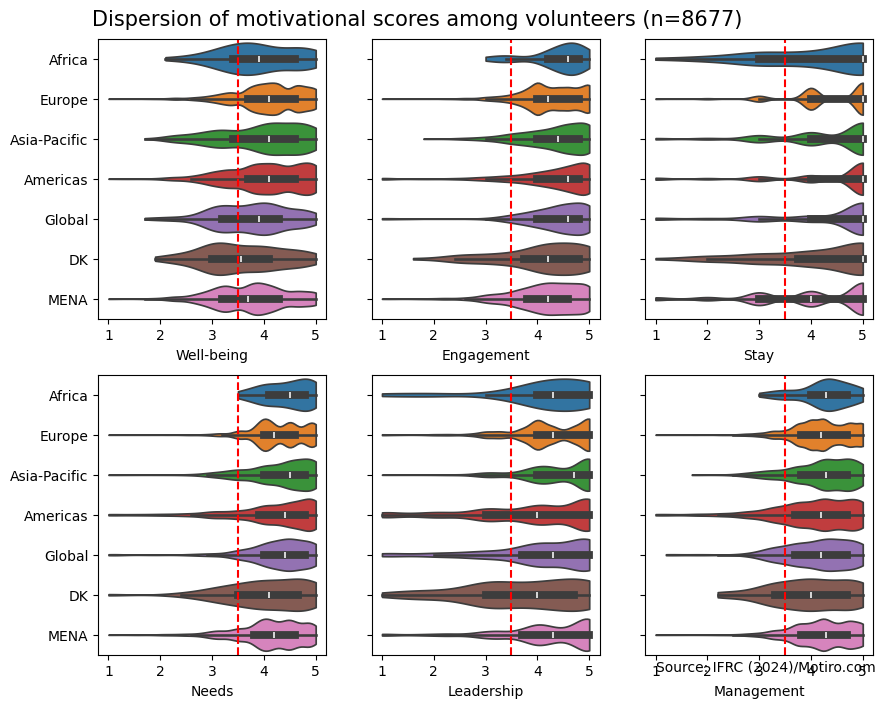

In [17]:
# Violin plots to see dispersion in key dimensions, by region (volunteers only)

# Load the dataframe from current directory as defined in cell 2 [12]
df = pd.read_csv(file_path, sep=",", encoding='utf-8')

# We keep only volunteers
df = df.drop(df[df.Position == 'Staff'].index)

#df = pd.read_csv("C:/Users/gabriel.pictet/Documents/Gabriel/REAL/Moti/Moti data/ungrouped_ALL_with_regions.txt")

## if you want to select spcific regions:
# # Filter the DataFrame for regions to keep 'Europe', 'Americas', 'MENA'
#df = df[df['Region'].isin(['Europe', 'Americas', 'MENA'])].copy()

# Count the total number of respondents (n)
# Count the total number of respondents (n)
n_vol = df['Volunteer'].sum()
n_staff = df['Staff'].sum()
n = df['Volunteer'].sum() + df['Staff'].sum()
print (n_vol, n_staff, n)

# Specify the x-axis variables for each plot
variables = [
    ('Well-being'),
    ('Engagement'),
    ('Stay'),
    ('Needs'),
    ('Leadership'),
    ('Management')
    ]

# Create a 3x3 grid of subplots sharing the same x-axis and y-axis
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10, 8), sharex=False, sharey=True)

# Flatten the axes array for easier iteration
axes = axes.flatten()

for i, (x_var) in enumerate(variables):
    ax = axes[i]  # Get the current subplot
    sns.violinplot(
    data=df, x=x_var, y='Region', hue="Region", legend=None, cut=0, ax=ax)
    plt.ylabel('')
    # Add vertical line to represent cut off values
    ax.axvline(x=3.5, color='red', linestyle='--')
    ax.set(ylabel=None)
    #ax.get_legend().remove()

ax.set_title(f'Dispersion of motivational scores among volunteers (n={n})', pad=50, y=2, x=-1, size=15)
plt.text(1, 6.9, "Source: IFRC (2024)/Motiro.com", fontdict={'size': 10})

# Save and show the plot
plt.savefig('violin_regions 3x2.png', bbox_inches='tight', pad_inches=0)
plt.show()

8677 0 8677


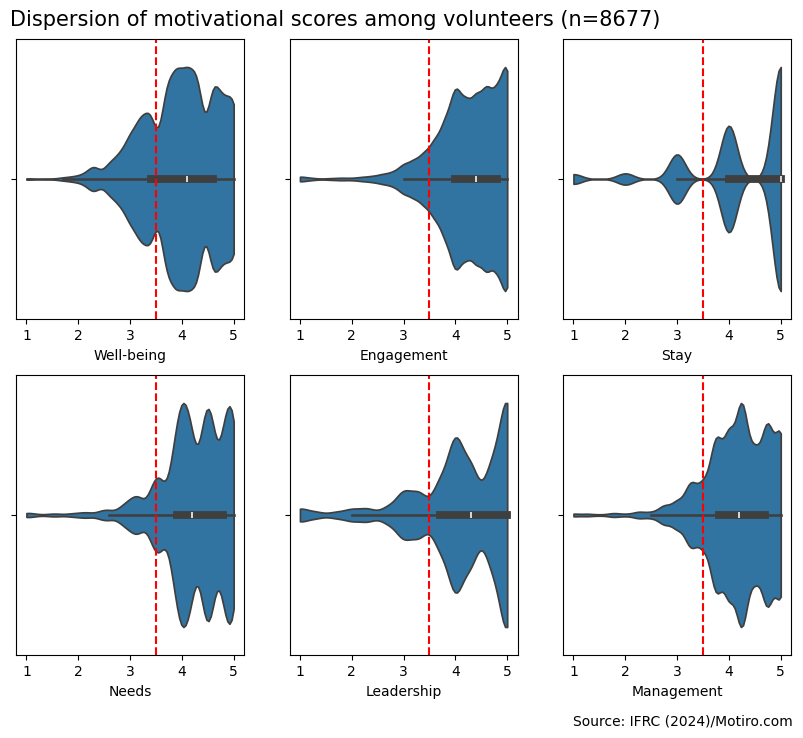

In [18]:
# Violin plots to see dispersion in key dimensions, aggregated (all regions)

# Load the dataframe from current directory as defined in cell 2 [12]
df = pd.read_csv(file_path, sep=",", encoding='utf-8')

# We keep only volunteers
df = df.drop(df[df.Position == 'Staff'].index)

## if you want to select spcific regions:
# # Filter the DataFrame for regions to keep 'Europe', 'Americas', 'MENA'
#df = df[df['Region'].isin(['Europe', 'Americas', 'MENA'])].copy()

# Count the total number of respondents (n)
n_vol = df['Volunteer'].sum()
n_staff = df['Staff'].sum()
n = df['Volunteer'].sum() + df['Staff'].sum()
print (n_vol, n_staff, n)

# Specify the x-axis variables for each plot
variables = [
    ('Well-being'),
    ('Engagement'),
    ('Stay'),
    ('Needs'),
    ('Leadership'),
    ('Management')
    ]

# Create a 3x3 grid of subplots sharing the same x-axis and y-axis
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10, 8), sharex=False, sharey=True)

# Flatten the axes array for easier iteration
axes = axes.flatten()

for i, (x_var) in enumerate(variables):
    ax = axes[i]  # Get the current subplot
    sns.violinplot(
    data=df, x=x_var, legend=None, cut=0, ax=ax)
    plt.ylabel('')
    # Add vertical line to represent cut off values
    ax.axvline(x=3.5, color='red', linestyle='--')
    ax.set(ylabel=None)
    #ax.get_legend().remove()

ax.set_title(f'Dispersion of motivational scores among volunteers (n={n})', pad=50, y=2, x=-1, size=15)
plt.text(1, 0.75, "Source: IFRC (2024)/Motiro.com", fontdict={'size': 10})

# Save and show the plot
plt.savefig('violin_regions 3x2.png', bbox_inches='tight', pad_inches=0)
plt.show()

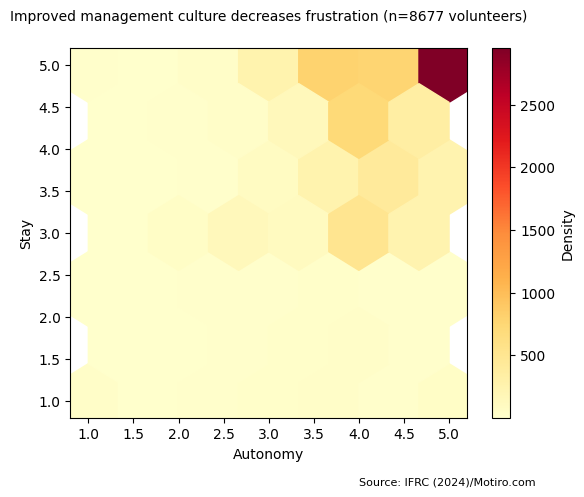

In [19]:
# density heatmap where the user is prompted to select the x and y axis variables,
# with the color of the hexagons determined by the number of observations in (x, y) cell

# Load the dataframe from current directory as defined in cell 2 [12]
df = pd.read_csv(file_path, sep=",", encoding='utf-8')

# We keep only volunteers
df = df.drop(df[df.Position == 'Staff'].index)

# Count the total number of respondents (n)
n_vol = df['Volunteer'].sum()
n_staff = df['Staff'].sum()
n = df['Volunteer'].sum() + df['Staff'].sum()


# Reset the index
#df = df.reset_index()

# Prompt the user to select x and y axis variables
x_axis = input("Enter the column name for the x-axis: ")
y_axis = input("Enter the column name for the y-axis: ")
#position = input("Enter Volunteer or Staff or both: ")

# Plot the density heatmap using hexbin
plt.hexbin(df[x_axis], df[y_axis], gridsize=6, cmap='YlOrRd', mincnt=1)

# Add a colorbar to indicate the density
plt.colorbar(label='Density')

# Add labels and title
plt.xlabel(x_axis)
plt.ylabel(y_axis)
plt.title(f'Improved management culture decreases frustration (n={n} volunteers)', pad=20, size=10)
plt.text(4, 0, "Source: IFRC (2024)/Motiro.com", fontdict={'size': 8})

# Show the plot
plt.savefig('management vs frustrated')
plt.show()


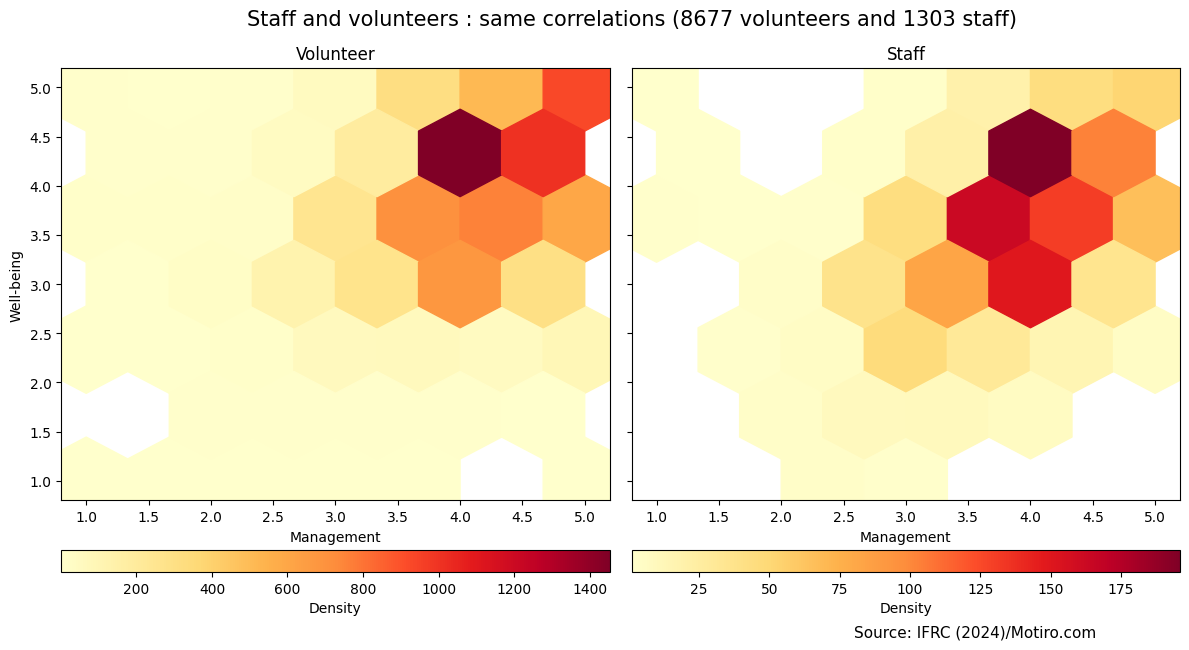

In [20]:
# Density heatmap where the user is prompted to select the x and y axis variables,
# with the color of the hexagons determined by the number of observations in (x, y) cell
# comparing staff and volunteers

# Load the dataframe from current directory as defined in cell 2 [12]
df = pd.read_csv(file_path, sep=",", encoding='utf-8')

# Count the total number of respondents (n)
n_vol = df['Volunteer'].sum()
n_staff = df['Staff'].sum()
n = df['Volunteer'].sum() + df['Staff'].sum()

# Prompt the user to select x and y axis variables
x_axis = input("Enter the column name for the x-axis: ")
y_axis = input("Enter the column name for the y-axis: ")

# Filter the dataframe for 'Position' = 'Volunteer'
df_volunteer = df[df['Position'] == 'Volunteer']

# Filter the dataframe for 'Position' = 'Staff'
df_staff = df[df['Position'] == 'Staff']

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(12, 6))

# Plot the density heatmap for 'Position' = 'Volunteer'
hex1 = ax1.hexbin(df_volunteer[x_axis], df_volunteer[y_axis], gridsize=6, cmap='YlOrRd', mincnt=1)
ax1.set_xlabel(x_axis)
ax1.set_ylabel(y_axis)
ax1.set_title("Volunteer")

# Plot the density heatmap for 'Position' = 'Staff'
hex2 = ax2.hexbin(df_staff[x_axis], df_staff[y_axis], gridsize=6, cmap='YlOrRd', mincnt=1)
ax2.set_xlabel(x_axis)
ax2.set_title("Staff")

# Add colorbars below each plot
divider1 = make_axes_locatable(ax1)
cax1 = divider1.append_axes("bottom", size="5%", pad=0.5)  # Adjust pad value
cbar1 = plt.colorbar(hex1, cax=cax1, orientation='horizontal')
cbar1.set_label('Density')

divider2 = make_axes_locatable(ax2)
cax2 = divider2.append_axes("bottom", size="5%", pad=0.5)  # Adjust pad value
cbar2 = plt.colorbar(hex2, cax=cax2, orientation='horizontal')
cbar2.set_label('Density')

# Adjust the spacing between subplots
plt.tight_layout()

plt.title(f'Staff and volunteers : same correlations ({n_vol} volunteers and {n_staff} staff)', y=24, x=0, pad=20, size=15)
plt.text(80, -3, "Source: IFRC (2024)/Motiro.com", fontdict={'size': 11})

# Save the plot as an image file
plt.savefig('VOL-STAFF heatmap.png')

# Show the plot
plt.show()


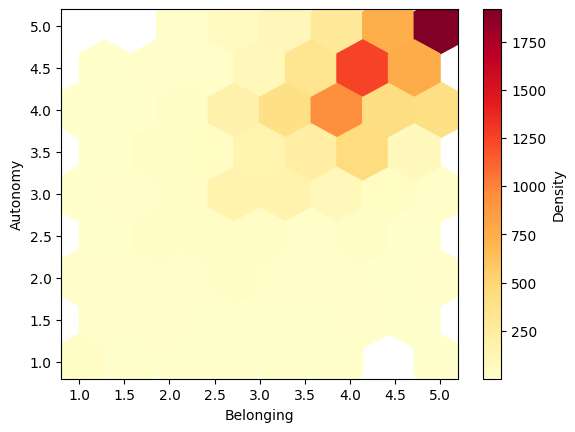

In [ ]:
# individual heatmaps to be pasted in Word Document

# Load the dataframe from current directory as defined in cell 2 [12]
df = pd.read_csv(file_path, sep=",", encoding='utf-8')

plt.hexbin(df['Belonging'], df['Autonomy'], gridsize=7, cmap='YlOrRd', mincnt=1)

# Add a colorbar to indicate the density
plt.colorbar(label='Density')

# Add labels and title
plt.xlabel('Belonging')
plt.ylabel('Autonomy')
plt.title('')

# Show the plot
plt.savefig('Belonging-Autonomy.png')
plt.show()

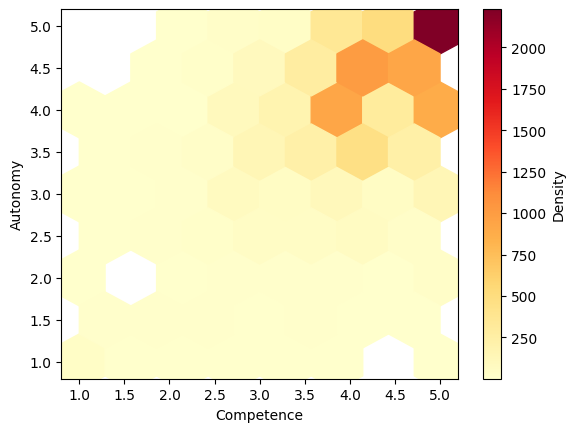

In [ ]:
# individual heatmaps to be pasted in Word Document

# Load the dataframe from current directory as defined in cell 2 [12]
df = pd.read_csv(file_path, sep=",", encoding='utf-8')

plt.hexbin(df['Competence'], df['Autonomy'], gridsize=7, cmap='YlOrRd', mincnt=1)

# Add a colorbar to indicate the density
plt.colorbar(label='Density')

# Add labels and title
plt.xlabel('Competence')
plt.ylabel('Autonomy')
plt.title('')

# Show the plot
plt.savefig('Competence-Autonomy.png')
plt.show()

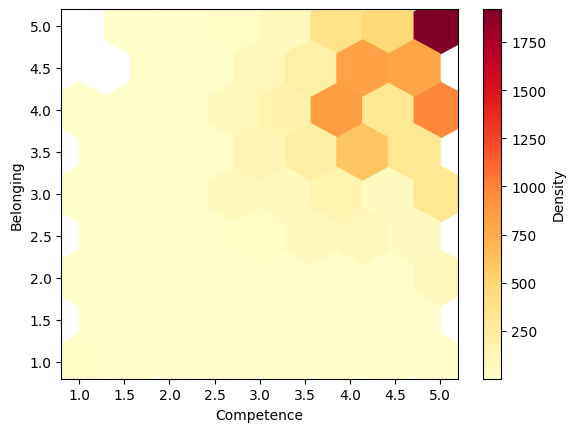

In [ ]:
# individual heatmaps to be pasted in Word Document

# Load the dataframe from current directory as defined in cell 2 [12]
df = pd.read_csv(file_path, sep=",", encoding='utf-8')

plt.hexbin(df['Competence'], df['Belonging'], gridsize=7, cmap='YlOrRd', mincnt=1)

# Add a colorbar to indicate the density
plt.colorbar(label='Density')

# Add labels and title
plt.xlabel('Competence')
plt.ylabel('Belonging')
plt.title('')

# Show the plot
plt.savefig('Competence-Belonging.png')
plt.show()

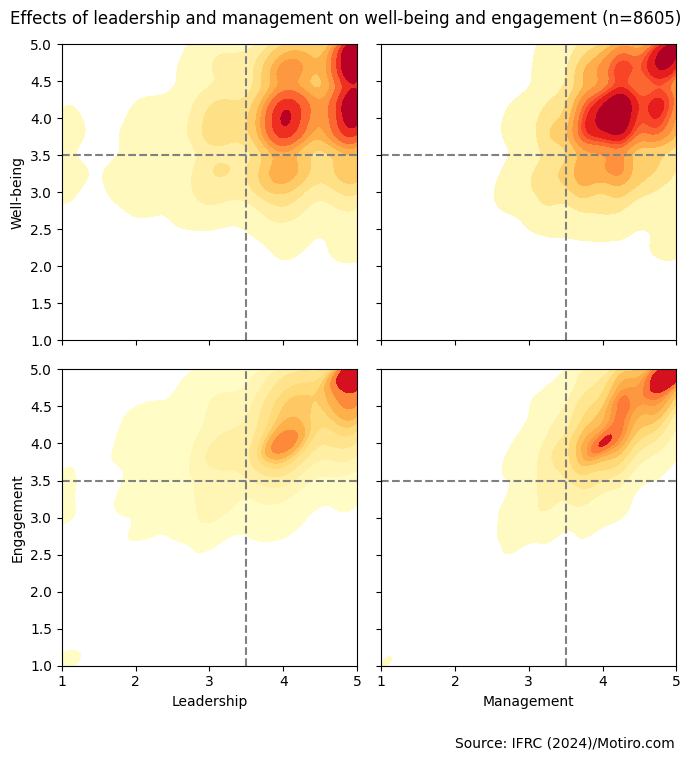

In [24]:
# Combined heatmaps

# Load the dataframe from current directory as defined in cell 2 [12]
df = pd.read_csv(file_path, sep=",", encoding='utf-8')

# We keep only volunteers
df = df.drop(df[df.Position == 'Staff'].index)

# Count the total number of respondents (n)
n_vol = df['Volunteer'].sum()
n_staff = df['Staff'].sum()
n = df['Volunteer'].sum() + df['Staff'].sum()

fig, axs = plt.subplots(2, 2, figsize=(7, 7), sharex=True, sharey=True)

# Plot density heatmaps using sns.kdeplot
# Plot density heatmaps using sns.kdeplot
ax = sns.kdeplot(y=df['Well-being'], x=df['Leadership'], cmap='YlOrRd', fill=True, ax=axs[0, 0])
ax.axvline(x=3.5, color='gray', linestyle='--')
ax.axhline(y=3.5, color='gray', linestyle='--')
ax.set_xlim(1, 5)
ax.set_ylim(1, 5)
ylabels = ['{:,.2f}']
ax = sns.kdeplot(y=df['Well-being'], x=df['Management'], cmap='YlOrRd', fill=True, ax=axs[0, 1])
ax.axvline(x=3.5, color='gray', linestyle='--')
ax.axhline(y=3.5, color='gray', linestyle='--')
ax = sns.kdeplot(y=df['Engagement'], x=df['Leadership'], cmap='YlOrRd', fill=True, ax=axs[1, 0])
ax.axvline(x=3.5, color='gray', linestyle='--')
ax.axhline(y=3.5, color='gray', linestyle='--')
ylabels = ['{:,.2f}']
ax = sns.kdeplot(y=df['Engagement'], x=df['Management'], cmap='YlOrRd', fill=True, ax=axs[1, 1])
ax.axvline(x=3.5, color='gray', linestyle='--')
ax.axhline(y=3.5, color='gray', linestyle='--')

# Adjust the spacing between subplots
plt.tight_layout()

plt.suptitle(f'Effects of leadership and management on well-being and engagement (n={n})',
             y=1.02, x=0.5, fontsize=12)

plt.text(2, -0.1, "Source: IFRC (2024)/Motiro.com", fontsize =10)

plt.savefig('Lead_Mgt heatmaps.png', bbox_inches='tight', pad_inches=0)
plt.show()

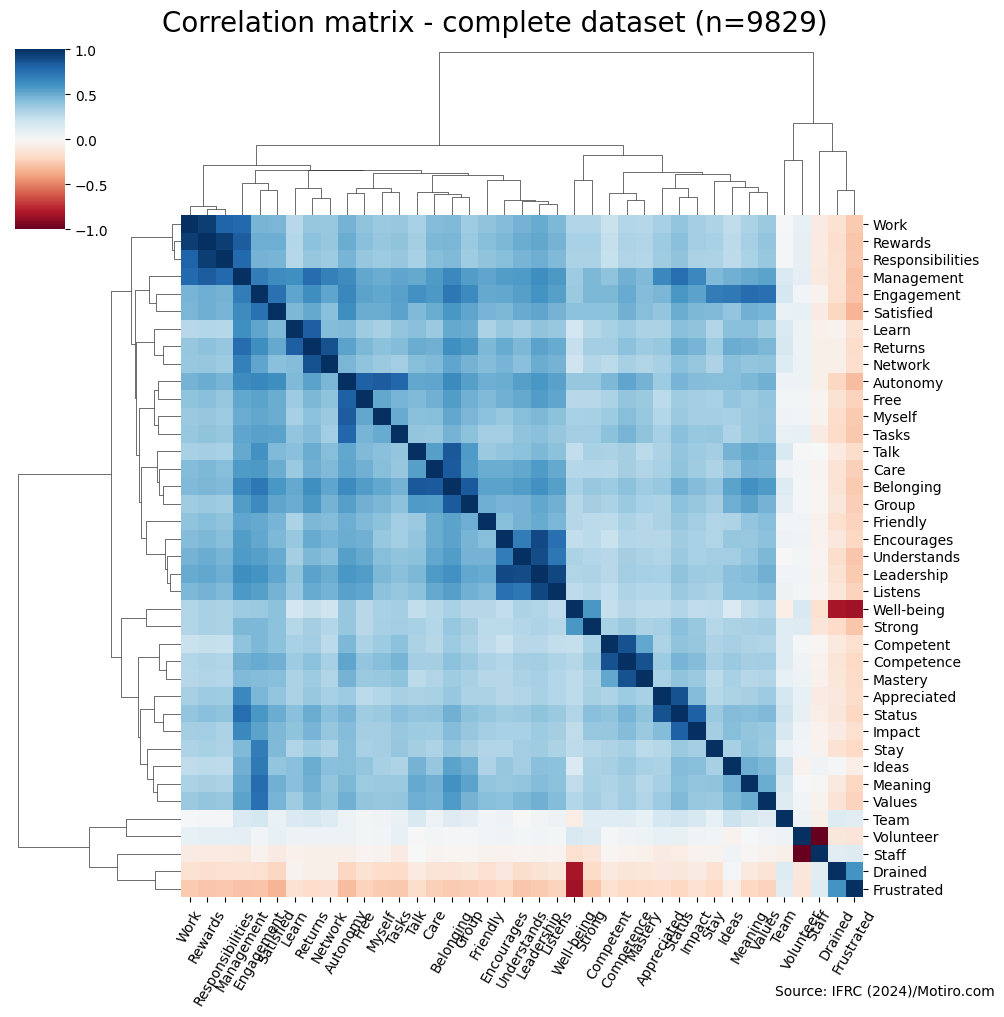

In [25]:
# Correlation matrix with all variables
# select all (default) or un comment filters for staff only or volunteer only.

# Load the dataframe from current directory as defined in cell 2 [12]
df = pd.read_csv(file_path, sep=",", encoding='utf-8')

# Count the total number of respondents (n)
n = df['Volunteer'].sum() +  df['Staff'].sum()
#n = df['Volunteer'].sum()
#n = df['Staff'].sum()

# Filter the dataframe for 'Position' = 'Volunteer'

#df = df[df['Position'] == 'Volunteer']

# Filter the dataframe for 'Position' = 'Staff'
#df = df[df['Position'] == 'Staff']

columns = ['Well-being', 'Engagement', 'Autonomy', 'Belonging', 'Competence',
           'Leadership', 'Management', 'Returns',
           'Rewards', 'Status', 'Myself', 'Tasks', 'Free', 'Mastery', 'Competent',
           'Learn', 'Group', 'Talk', 'Care', 'Satisfied', 'Meaning', 'Stay',
           'Ideas', 'Values', 'Understands', 'Encourages', 'Listens','Network',
           'Friendly', 'Team', 'Appreciated', 'Responsibilities', 'Work', 'Impact',
           'Strong', 'Drained','Frustrated',
# Comment volunteer and staff variables if data is filtered.
           'Volunteer', 'Staff']

# Create the table with the desired columns
df = df[columns]

g = sns.clustermap(df.corr(), 
                   method = 'complete', 
                   cmap   = 'RdBu', 
                   annot  = False, 
                   annot_kws = {'size': 8})
plt.setp(g.ax_heatmap.get_xticklabels(), rotation=60);

# Adjust the spacing between subplots
#plt.tight_layout()

plt.suptitle(
            f'Correlation matrix - complete dataset (n={n})',
         #  f'Correlation matrix - volunteers (n={n})',
         #  f'Correlation matrix - staff (n={n})',
            y=1.02, x=0.5, size=20)

plt.text(15.2, -9.5, "Source: IFRC (2024)/Motiro.com", fontdict={'size': 10})


# Show the plot
plt.savefig('ALL_Correlation Matrix.png', bbox_inches='tight', pad_inches=0)
plt.show()


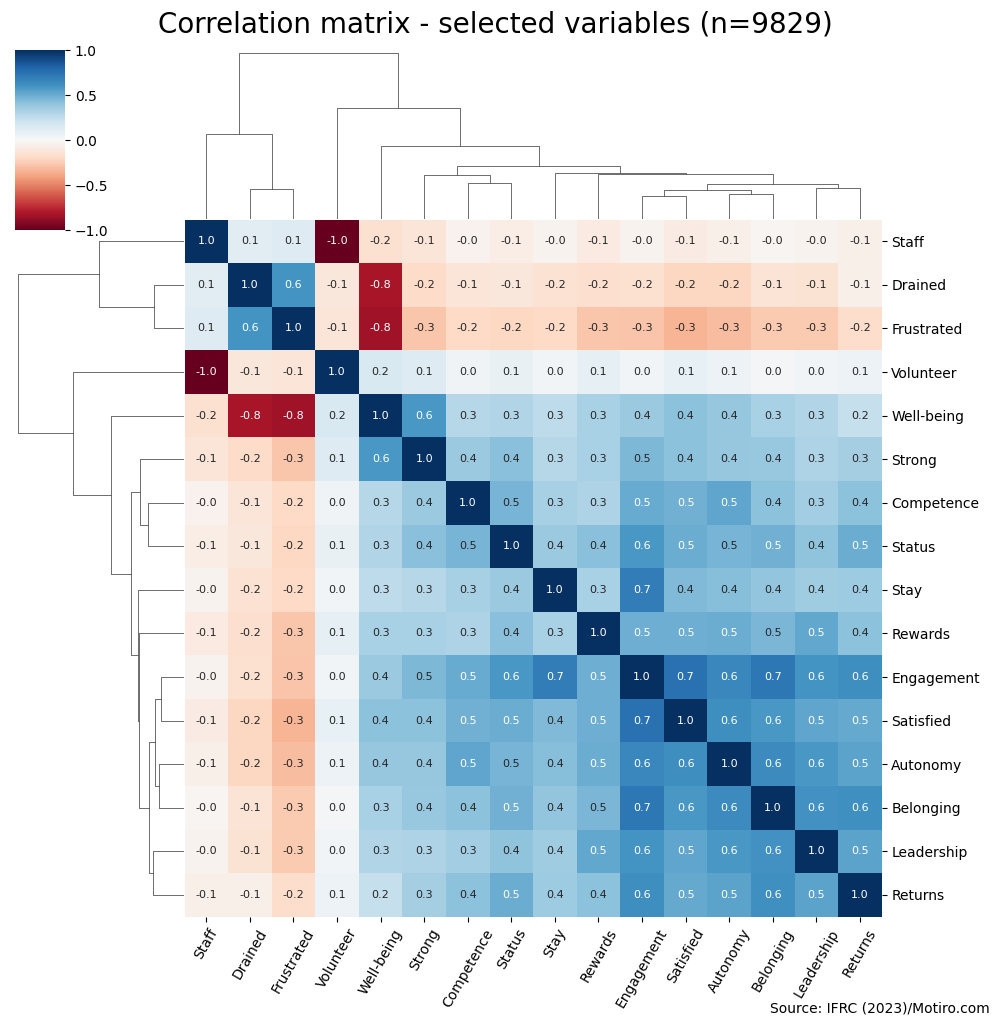

In [26]:
# Summary correlation matrix with grouped scores - All countries

# Load the dataframe from current directory as defined in cell 2 [12]
df = pd.read_csv(file_path, sep=",", encoding='utf-8')

# Filter the dataframe for 'Position' = 'Volunteer'
#df = df[df['Position'] == 'Volunteer']


# Count the total number of respondents (n)
n = df['Volunteer'].sum() +  df['Staff'].sum()
#n = df['Volunteer'].sum()
#n = df['Staff'].sum()

columns = ['Volunteer',
           'Staff',
           'Well-being',
           'Engagement',
           'Autonomy',
           'Belonging',
           'Competence',
           'Leadership',
           'Returns',
           'Rewards',
           'Status',
           'Satisfied',
           'Stay',
           'Strong',
           'Drained',
           'Frustrated']


# Filter the dataframe for 'Position' = 'Staff'
#df_staff = df[df['Position'] == 'Staff']

# Create the table with the desired columns
df = df[columns]
#df = pd.read_csv("C:/Users/gabriel.pictet/Documents/Gabriel/REAL/Moti/Moti data/ungrouped_ALL.csv")

g = sns.clustermap(df.corr(), 
                   method = 'complete', 
                   cmap   = 'RdBu', 
                   annot  = True , fmt=".1f",
                   annot_kws = {'size': 8})
plt.setp(g.ax_heatmap.get_xticklabels(), rotation=60);

# Adjust the spacing between subplots
#plt.tight_layout()

plt.suptitle(
            f'Correlation matrix - selected variables (n={n})',
         #  f'Correlation matrix - volunteers (n={n})',
         #  f'Correlation matrix - staff (n={n})',
            y=1.02, x=0.5, size=20)

plt.text(15.1, -9.7, "Source: IFRC (2023)/Motiro.com", fontdict={'size': 10})

# Show the plot
plt.savefig('ALL_Summary Correlation Matrix.png', bbox_inches='tight', pad_inches=0)
plt.show()


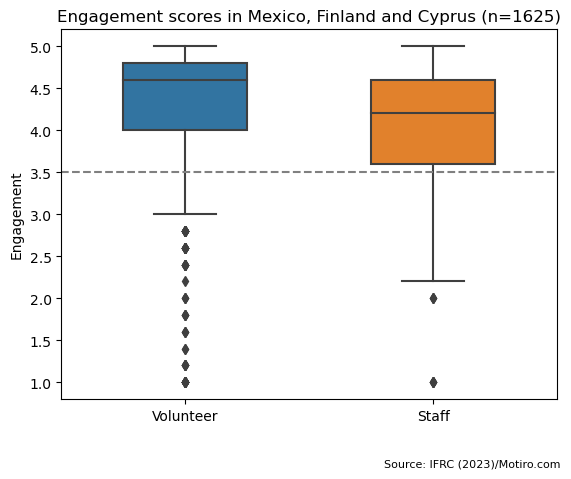

In [ ]:
# Box plots to see variance in key dimensions, by country

# Load the dataframe from current directory as defined in cell 2 [12]
df = pd.read_csv(file_path, sep=",", encoding='utf-8')

# Filter the dataframe for 'Position' = 'Volunteer'
#df = df[df['Position'] == 'Staff']

# Filter the DataFrame for teams from 'Mexico' and 'Lebanon'
df = df[df['country'].isin(['Mexico', 'Finland', 'Cyprus'])].copy()

# Count the total number of respondents (n)
n = df['Volunteer'].sum() + df['Staff'].sum()

bplot=sns.boxplot(y='Engagement', x='Position', 
                 data=df, 
                 width=0.5)

# plt.setp(bplot.get_xticklabels(), rotation=45)
plt.xlabel('')

# Add horizontal line to represent cut off values
plt.axhline(y=3.5, color='gray', linestyle='--')

# Set the title
bplot.set_title(f'Engagement scores in Mexico, Finland and Cyprus (n={n})')

plt.text(0.8, -0.01, "Source: IFRC (2023)/Motiro.com", fontdict={'size': 8})

# Save and show the plot
plt.savefig('VOL-STAFF_Engagement_boxplot_3countries.png', bbox_inches='tight', pad_inches=0)
plt.show()

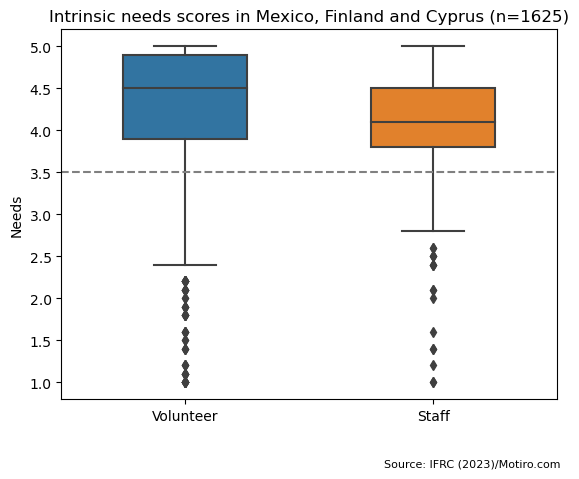

In [ ]:
# Box plots to see variance in key dimensions, by country

# Load the dataframe from current directory as defined in cell 2 [12]
df = pd.read_csv(file_path, sep=",", encoding='utf-8')

# Filter the dataframe for 'Position' = 'Volunteer'
#df = df[df['Position'] == 'Staff']

# Filter the DataFrame for teams from 'Mexico' and 'Lebanon'
df = df[df['country'].isin(['Mexico', 'Finland', 'Cyprus'])].copy()

# Count the total number of respondents (n)
n = df['Volunteer'].sum() + df['Staff'].sum()

bplot=sns.boxplot(y='Needs', x='Position', 
                 data=df, 
                 width=0.5)

plt.xlabel('')

# Add horizontal line to represent cut off values
plt.axhline(y=3.5, color='gray', linestyle='--')

# Set the title
bplot.set_title(f'Intrinsic needs scores in Mexico, Finland and Cyprus (n={n})')

plt.text(0.8, -0.01, "Source: IFRC (2023)/Motiro.com", fontdict={'size': 8})

# Save and show the plot
plt.savefig('VOL-STAFF_Needs_boxplot_3countries.png', bbox_inches='tight', pad_inches=0)
plt.show()

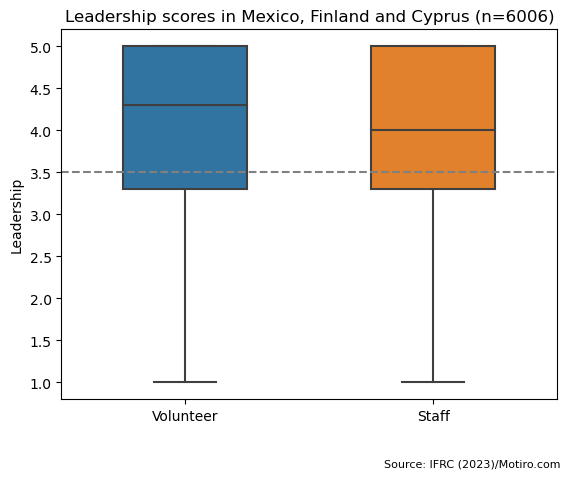

In [ ]:
# Box plots to see variance in key dimensions, by countr

# Load the dataframe from current directory as defined in cell 2 [12]
df = pd.read_csv(file_path, sep=",", encoding='utf-8')

# Filter the dataframe for 'Position' = 'Volunteer'
#df = df[df['Position'] == 'Staff']

# Filter the DataFrame for teams from 'Mexico' and 'Lebanon'
df = df[df['country'].isin(['Mexico', 'Finland', 'Cyprus'])].copy()

# Count the total number of respondents (n)
n = df['Volunteer'].sum() + df['Staff'].sum()

bplot=sns.boxplot(y='Leadership', x='Position', 
                 data=df, 
                 width=0.5)

# Add horizontal line to represent cut off values
plt.axhline(y=3.5, color='gray', linestyle='--')

plt.xlabel('')

# Set the title
bplot.set_title(f'Leadership scores in Mexico, Finland and Cyprus (n={n})')

plt.text(0.8, -0.01, "Source: IFRC (2023)/Motiro.com", fontdict={'size': 8})

# Save and show the plot
plt.savefig('VOL-STAFF_Leadership_boxplot_3countries.png', bbox_inches='tight', pad_inches=0)
plt.show()

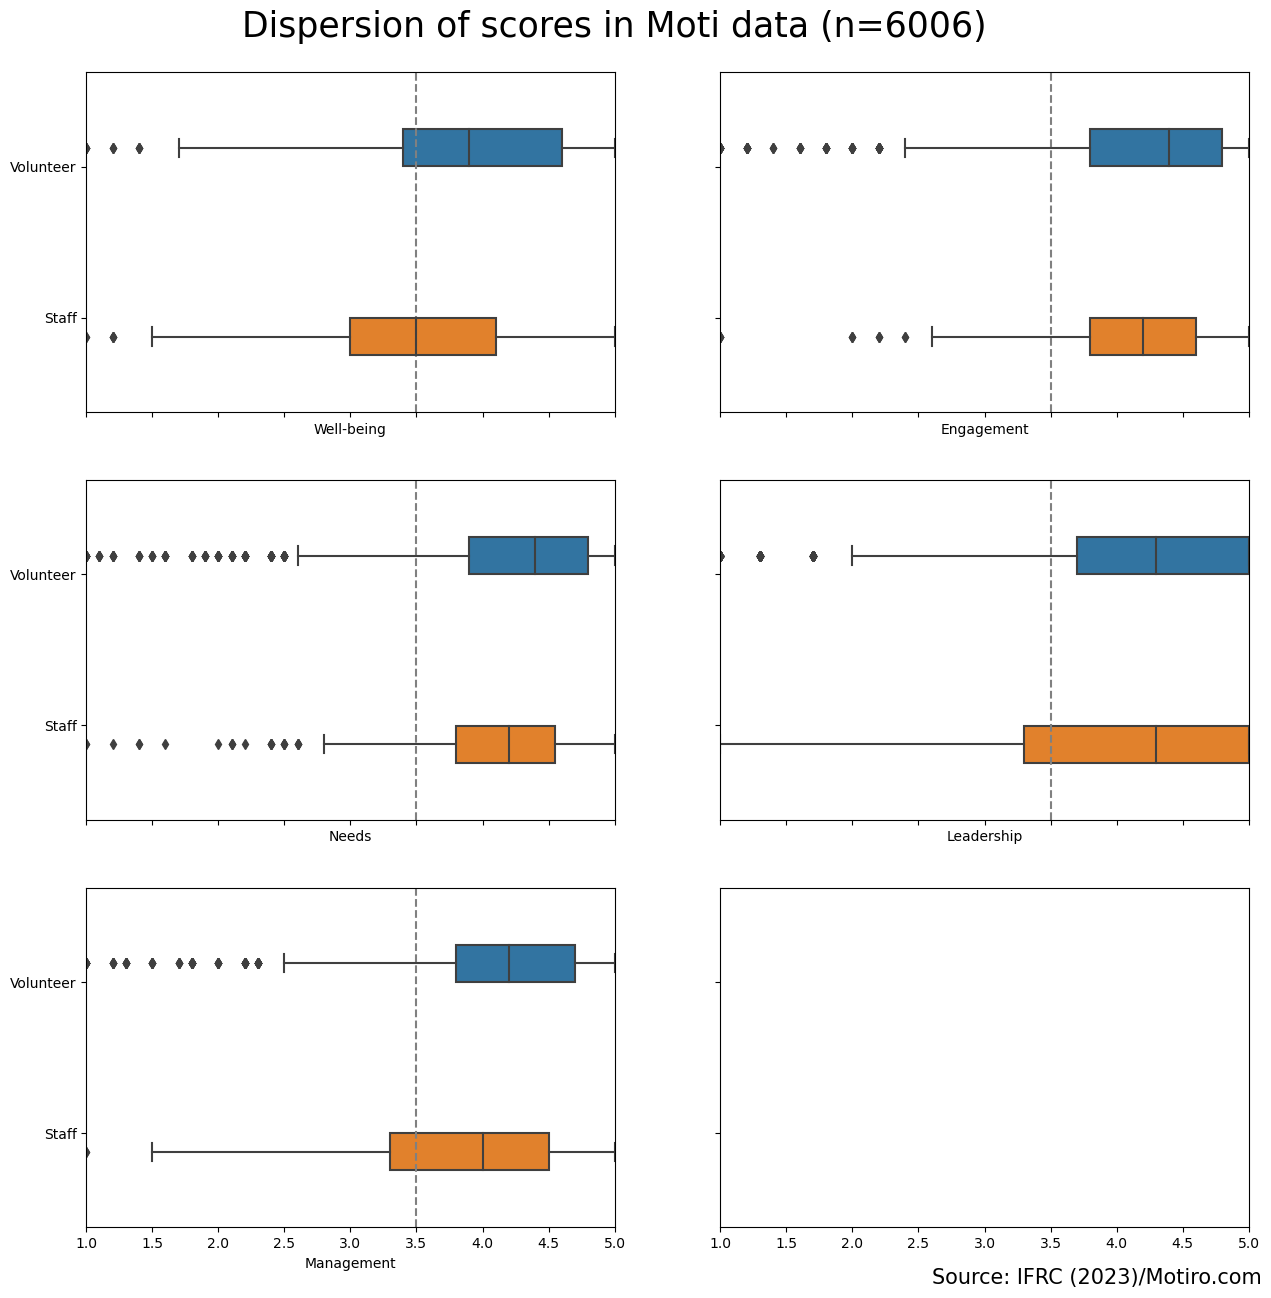

In [ ]:
# Box plots to see dispersion in key dimensions, complete Moti dataset (everyone)

# Load the dataframe from current directory as defined in cell 2 [12]
df = pd.read_csv(file_path, sep=",", encoding='utf-8')

# Specify the x-axis and y-axis variables for each plot
variables = [
    ('Position', 'Well-being'),
    ('Position', 'Engagement'),
    ('Position', 'Needs'),
    ('Position', 'Leadership'),
    ('Position', 'Management')
    ]

# Create a 3x3 grid of subplots sharing the same x-axis and y-axis
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15), sharex=True, sharey=True)

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Count the total number of respondents (n)
n = df['Volunteer'].sum() + df['Staff'].sum()

for i, (x_var, y_var) in enumerate(variables):
    ax = axes[i]  # Get the current subplot
    bplot=sns.boxplot(y=x_var, x=y_var, 
                 data=df, 
                 hue='Position',
                 width=0.5,
                 ax=ax)
    bplot.set(ylabel=None)
    bplot.get_legend().remove()
    # Add vertical line to represent cut off values
    ax.axvline(x=3.5, color='gray', linestyle='--')

#set margin
    ax.margins(x=0, y=20)

# Set the title
ax.set_title(f'Dispersion of scores in Moti data (n={n})', pad=50, y=3.3, x=1, fontdict={'size': 25})

plt.text(2.6, 2, "Source: IFRC (2023)/Motiro.com", fontdict={'size': 15})

# Save and show the plot
plt.savefig('VOL-STAFF_combined_Everyone_boxplot.png', bbox_inches='tight', pad_inches=0)
plt.show()

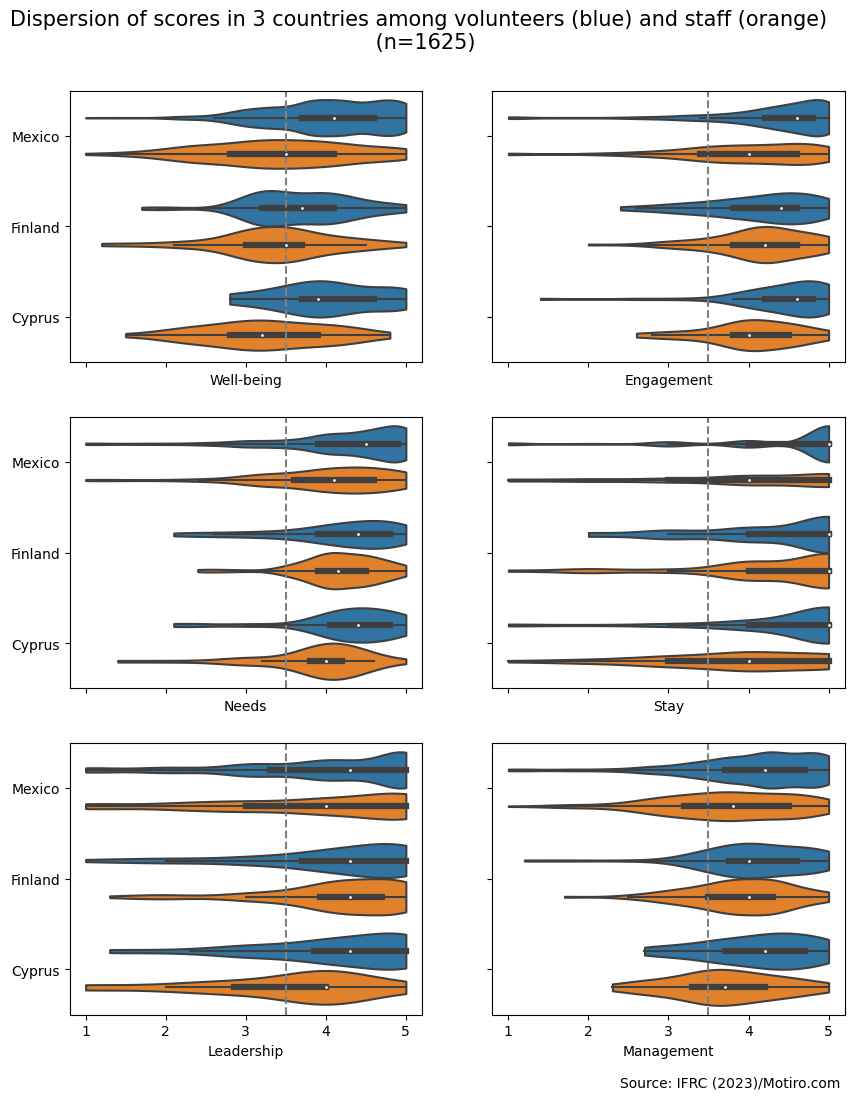

In [ ]:
# Box plots to see dispersion in key dimensions, 3 countries (everyone)

# Load the dataframe from current directory as defined in cell 2 [12]
df = pd.read_csv(file_path, sep=",", encoding='utf-8')

# Filter the DataFrame for teams from 'Mexico', 'Cyprus and Finland'
df = df[df['country'].isin(['Finland', 'Mexico', 'Cyprus'])].copy()

# Count the total number of respondents (n)
n = df['Volunteer'].sum() + df['Staff'].sum()

# Specify the x-axis variables for each plot
variables = [
    ('Well-being'),
    ('Engagement'),
    ('Needs'),
    ('Stay'),
    ('Leadership'),
    ('Management')
    ]

# Create a 3x3 grid of subplots sharing the same x-axis and y-axis
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10, 12), sharex=True, sharey=True)

# Flatten the axes array for easier iteration
axes = axes.flatten()

for i, (x_var) in enumerate(variables):
    ax = axes[i]  # Get the current subplot
    sns.violinplot(
    data=df, x=x_var, y='country', hue="Position", kind="violin", legend=None, cut=0, ax=ax)
    plt.ylabel('')
    # Add vertical line to represent cut off values
    ax.axvline(x=3.5, color='gray', linestyle='--')
    ax.set(ylabel=None)
    ax.get_legend().remove()

ax.set_title(f'Dispersion of scores in 3 countries among volunteers (blue) and staff (orange) \n (n={n})', pad=50, y=3.3, x=-0.2, size=15)
plt.text(2.4, 3.3, "Source: IFRC (2023)/Motiro.com", fontdict={'size': 10})

# Save and show the plot
plt.savefig('VOL-STAFF_combined_violin_3countries 2x3.png', bbox_inches='tight', pad_inches=0)
plt.show()

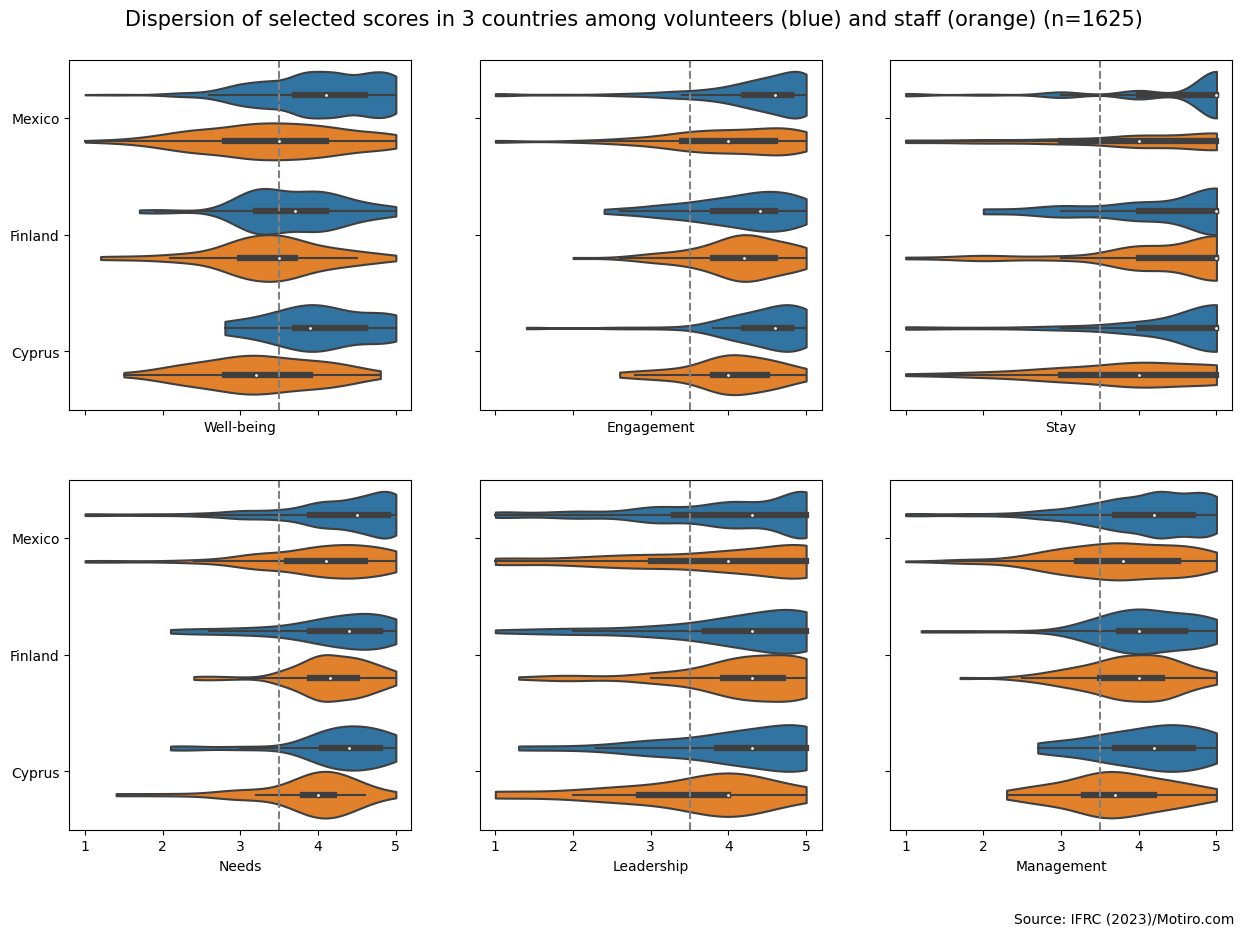

In [ ]:
# Box plots to see dispersion in key dimensions, 3 countries (everyone)

# Load the dataframe from current directory as defined in cell 2 [12]
df = pd.read_csv(file_path, sep=",", encoding='utf-8')

# Filter the DataFrame for teams from 'Mexico', 'Cyprus and Finland'
df = df[df['country'].isin(['Finland', 'Mexico', 'Cyprus'])].copy()

# Count the total number of respondents (n)
n = df['Volunteer'].sum() + df['Staff'].sum()

# Specify the x-axis variables for each plot
variables = [
    ('Well-being'),
    ('Engagement'),
    ('Stay'),
    ('Needs'),
    ('Leadership'),
    ('Management')
    ]

# Create a 2x3 grid of subplots sharing the same x-axis and y-axis
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10), sharex=True, sharey=True)

# Flatten the axes array for easier iteration
axes = axes.flatten()

for i, (x_var) in enumerate(variables):
    ax = axes[i]  # Get the current subplot
    sns.violinplot(
    data=df, x=x_var, y='country', hue="Position", kind="violin", legend=None, cut=0, ax=ax)
    plt.ylabel('')
    # Add vertical line to represent cut off values
    ax.axvline(x=3.5, color='gray', linestyle='--')
    ax.set(ylabel=None)
    ax.get_legend().remove()

ax.set_title(f'Dispersion of selected scores in 3 countries among volunteers (blue) and staff (orange) (n={n})', pad=50, x=-0.75, y=2.1, size=15)
plt.text(2.4, 3.3, "Source: IFRC (2023)/Motiro.com", fontdict={'size': 10})

# Save and show the plot
plt.savefig('VOL-STAFF_combined_violin_3countries 2x3.png', bbox_inches='tight', pad_inches=0)
plt.show()

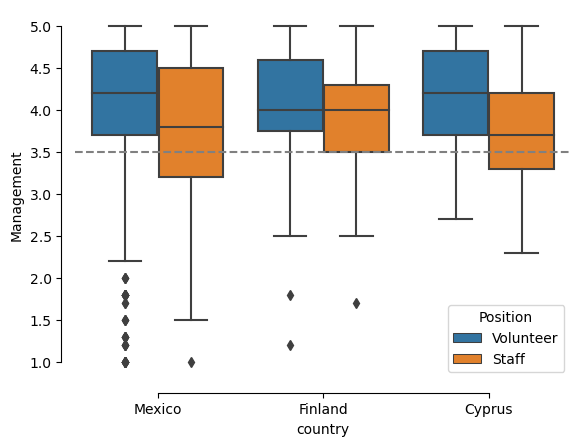

In [ ]:
# Box plots to see dispersion in key dimensions, complete Moti dataset (everyone)

# Load the dataframe from current directory as defined in cell 2 [12]
df = pd.read_csv(file_path, sep=",", encoding='utf-8')

# Filter the DataFrame for teams from 'Mexico' and 'Lebanon'
df = df[df['country'].isin(['Cyprus', 'Finland', 'Mexico'])].copy()

# Draw a nested boxplot to show bills by day and time
sns.boxplot(x="country", y="Management",
            hue="Position",
            data=df)
sns.despine(offset=10, trim=True)
# Add vertical line to represent cut off values
plt.axhline(y=3.5, color='gray', linestyle='--')


# Set the title
#bplot.set_title('Dispersion of scores in Mexico')
#plt.suptitle('Dispersion of scores in Mexico', fontdict={'size': 100})
ax.set_title('Dispersion of scores in Moti data', pad=50, y=3.3, x=1, fontdict={'size': 25})

# Save and show the plot
plt.savefig('VOL-STAFF_combined_Management_grouped_boxplots.png', bbox_inches='tight', pad_inches=0)
plt.show()

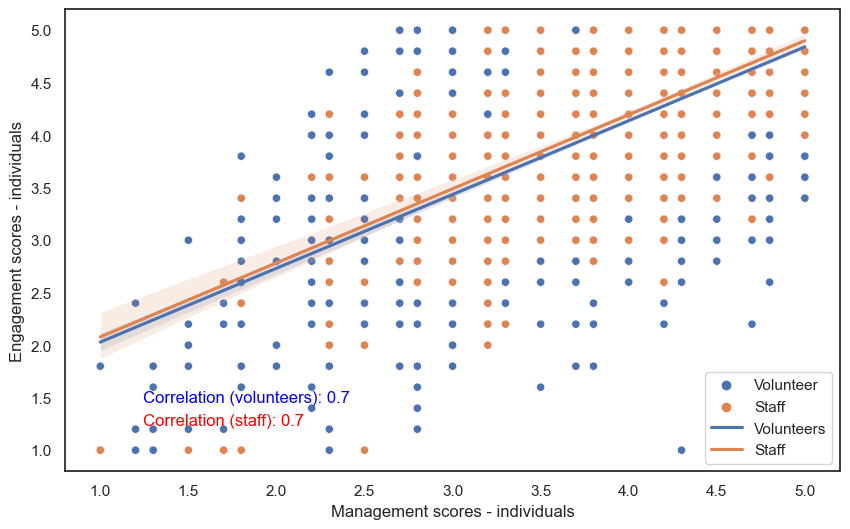

In [ ]:

# Scatter plot to see correlations in key dimensions @ individual level, complete Moti dataset (everyone)
sns.set(style="white")

# Load the dataframe from current directory as defined in cell 2 [12]
df = pd.read_csv(file_path, sep=",", encoding='utf-8')

# Create the bubble graph
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Management', y='Engagement', hue='Position',
                sizes=())

# Add trend lines for 'Volunteer' and 'Staff'
volunteer_data = df[df['Volunteer'] == 1]
staff_data = df[df['Staff'] == 1]

sns.regplot(data=volunteer_data, x='Management', y='Engagement', scatter=False, label='Volunteers')
sns.regplot(data=staff_data, x='Management', y='Engagement', scatter=False, label='Staff')

# Drop rows with missing or invalid values
volunteer_data = volunteer_data.dropna(subset=['Management', 'Engagement'])
staff_data = staff_data.dropna(subset=['Management', 'Engagement'])

# Calculate and display correlation coefficients
volunteer_corr = pearsonr(volunteer_data['Management'], volunteer_data['Engagement'])[0]
staff_corr = pearsonr(staff_data['Management'], staff_data['Engagement'])[0]

# Add correlation coefficient labels within the plot area
plt.text(0.1, 0.15, f'Correlation (volunteers): {volunteer_corr:.1f}', color='blue', transform=plt.gca().transAxes)
plt.text(0.1, 0.10, f'Correlation (staff): {staff_corr:.1f}', color='red', transform=plt.gca().transAxes)

# Set the labels and title
plt.xlabel("Management scores - individuals")
plt.ylabel('Engagement scores - individuals')
# plt.title('Well-being is colosely correlated with management culture')

# Show the legend
plt.legend(loc = "lower right")

# Save and show the plot
plt.savefig('VOL-STAFF_corr_Managemt-Engagement.png', bbox_inches='tight', pad_inches=0)
plt.show()

In [72]:
# Compare Portuguese youth teams (JCV) with volunteer benchmaks
df = pd.read_csv("C:/Users/gabriel.pictet/Documents/Gabriel/REAL/Moti/Moti data/ungrouped_ALL_with_regions.txt")

# Filter the dataframe for 'Position' = 'Volunteer'
VOL_df = df[df['Position'] == 'Volunteer'].copy()

# Convert 'TeamSize' column to numeric
#VOL_df['size (n)'] = pd.to_numeric(VOL_df["size (n)"], errors='coerce')

# Filter the DataFrame for teams from 'Portugal'
JCV_df = VOL_df[VOL_df['country'].isin(['Portugal'])].copy()
JCV_df['country'] = 'Portugal'
#JCV_df = JCV_df.groupby('Team Name').mean().reset_index()

# Filter the DataFrame for selected countries with many volunteers
Country_df = VOL_df[VOL_df['country'].isin(['Mexico', 'Lebanon', 'Kyrgyzstan', 'Finland', 'Cyprus'])].copy()
Country_df['Team Name'] = Country_df['country']
# Country_df = Country_df.groupby('country').mean().reset_index()

#Create Volunteer country benchmarks
# Merge the two dataframes
Portugal_df = pd.concat([JCV_df, Country_df], ignore_index=True)

# Pivot Portugal_df
Portugal_table = pd.pivot_table(data=Portugal_df, columns='Team Name',
                       values=['Well-being', 'Drained', 'Frustrated', 'Strong',
                               'Ideas', 'Values', 'Meaning', 'Stay',
                               'Needs', 'Autonomy', 'Belonging', 'Competence',
                               'Leadership', 'Listens', 'Understands', 'Encourages',
                               'Management', 'Rewards', 'Returns', 'Status'],
                       aggfunc=np.mean).round(1)

Portugal_table.to_excel('Portugal_table.xlsx', index=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3899 entries, 0 to 3898
Data columns (total 43 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Team Name         3899 non-null   object 
 1   country           3899 non-null   object 
 2   Well-being        3899 non-null   float64
 3   Needs             3899 non-null   float64
 4   Engagement        3899 non-null   float64
 5   Autonomy          3899 non-null   float64
 6   Belonging         3899 non-null   float64
 7   Competence        3899 non-null   float64
 8   Leadership        3899 non-null   float64
 9   Management        3899 non-null   float64
 10  Returns           3899 non-null   float64
 11  Rewards           3899 non-null   float64
 12  Status            3899 non-null   float64
 13  Myself            3899 non-null   int64  
 14  Tasks             3899 non-null   int64  
 15  Free              3899 non-null   int64  
 16  Mastery           3899 non-null   int64  
